# TSF Task 1: Prediction Using Supervised ML

# Author : Spriha Ghosh

## Problem: Predict the percentage of marks that a student is expected to score based on the number of hours they studied. 

### Description: This is a simple regression task involving just 2 variables.

In [ ]:
#Inport the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
# Load the dataset from Remote Link
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
print('Data Has Been Successfully Imported')
data.head()

Data Has Been Successfully Imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
#Check the missing values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

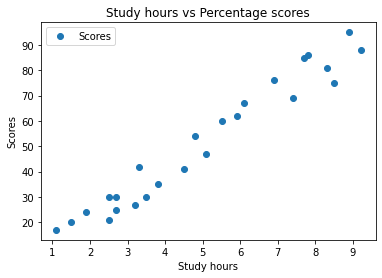

In [10]:
#Visualize the data using scatterplot
data.plot(x="Hours",y="Scores",style='o')
plt.title("Study hours vs Percentage scores")
plt.xlabel("Study hours")
plt.ylabel("Scores")
plt.show()

In [11]:
#Confirm correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation

In [12]:
# divide the data into "attributes" (x) and "labels" (y)
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Split the Data into Training & Testing Sets
Use Scikit-Learn's train_test_split() function

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Model

In [17]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

# Plot the Regression Line

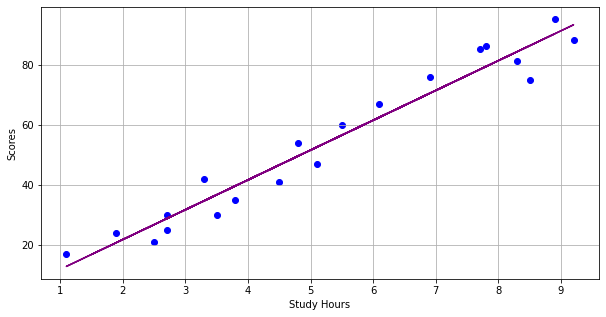

In [22]:
line = model.coef_*X + model.intercept_

plt.rcParams["figure.figsize"] = [10,5]
plt.scatter(X_train , y_train,color= 'blue')
plt.plot(X, line , color= 'purple');
plt.xlabel('Study Hours')
plt.ylabel('Scores')

plt.grid()
plt.show()

# Make Predictions

In [23]:
print(X_test) #Test Data In Hours
y_pred = model.predict(X_test) #Predict Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

In [26]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

# Compare Actual v/s Predicted Score

In [28]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [30]:
# Testing with new data
# What will be the predicted score if a student studies for 9.25 hrs/day?

hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict(test)
print('Study Hours = {}'.format(hours))
print('Predicted Score = {} '.format(own_pred[0]))

Study Hours = 9.25
Predicted Score = 93.69173248737538 


# Evaluate The Model

In [33]:
from sklearn import metrics 
print ('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
